<a href="https://colab.research.google.com/github/kalana-mihiranga/Image-Captioning/blob/main/PHASE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 544.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 3.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.6.0+cu124 requires torch==2.6.0, but you have torch 2.0.1+cu118 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 3.0 MB/s eta 0:00:00
PyTorch version: 2.6.0+cu124
CUDA available: True
GPU: Tesla T4


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Xformers not available - proceeding without optimization

Generating image 1/4
Prompt: A futuristic cityscape at night with neon lights


  0%|          | 0/30 [00:00<?, ?it/s]


Generating image 2/4
Prompt: A realistic photo of a dragon flying over mountains


  0%|          | 0/30 [00:00<?, ?it/s]


Generating image 3/4
Prompt: An astronaut riding a horse in space, digital art


  0%|          | 0/30 [00:00<?, ?it/s]


Generating image 4/4
Prompt: A cute corgi puppy wearing sunglasses on a beach


  0%|          | 0/30 [00:00<?, ?it/s]

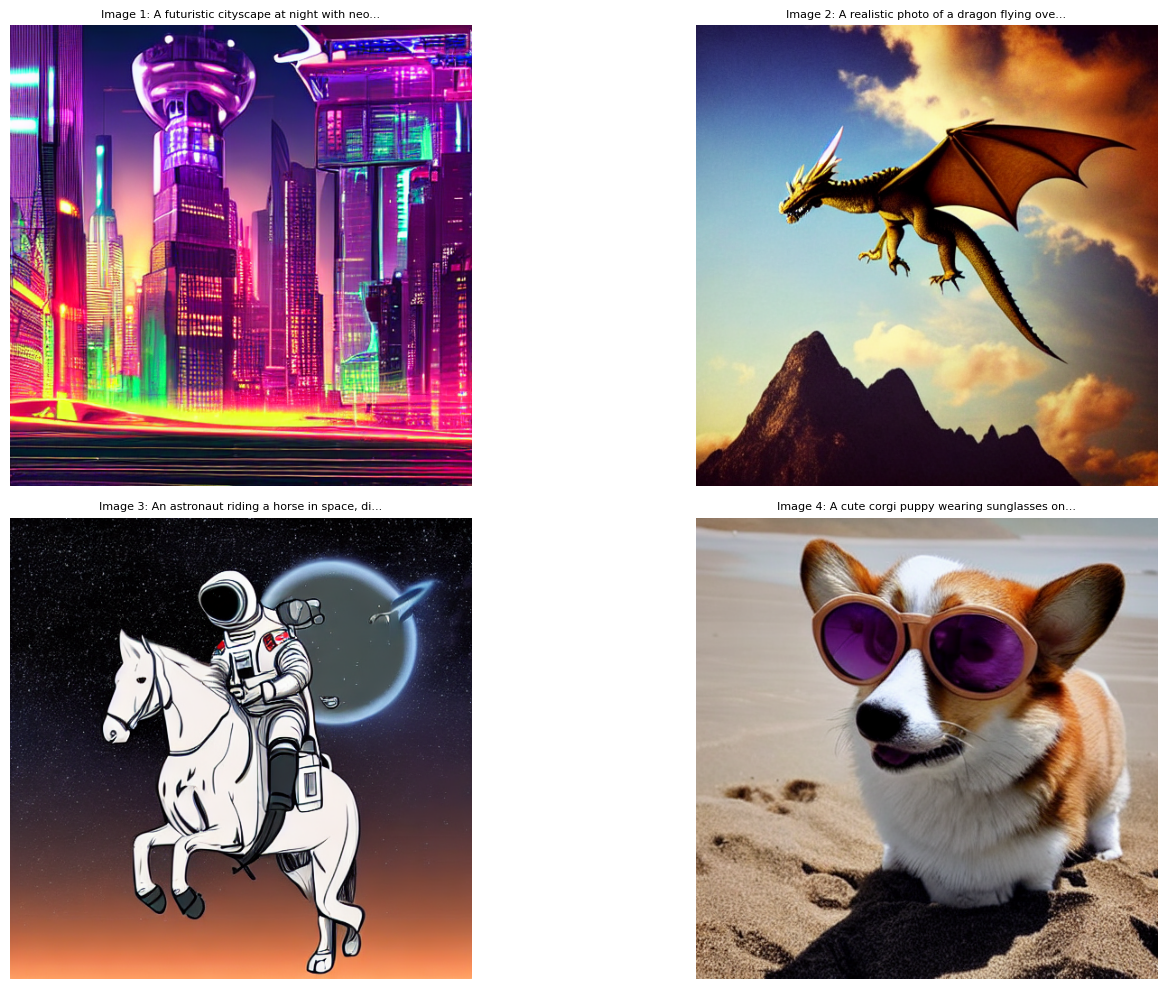

In [3]:

# Section 1: Install Dependencies
!pip install -q torch==2.0.1+cu118 torchvision==0.15.2+cu118 --extra-index-url https://download.pytorch.org/whl/cu118
!pip install -q xformers==0.0.20 diffusers==0.19.3 transformers accelerate safetensors

# Section 2: Configuration
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

# Configuration parameters (instead of widgets)
MODEL_CHOICE = "runwayml/stable-diffusion-v1-5"
NUM_IMAGES = 4
IMAGE_SIZE = 512
NUM_STEPS = 30
GUIDANCE_SCALE = 7.5
SEED = -1  # -1 for random

# Sample prompts (replace with your own)
PROMPTS = [
    "A futuristic cityscape at night with neon lights",
    "A realistic photo of a dragon flying over mountains",
    "An astronaut riding a horse in space, digital art",
    "A cute corgi puppy wearing sunglasses on a beach"
]

# Section 3: Initialize Pipeline
def initialize_pipeline():
    pipe = StableDiffusionPipeline.from_pretrained(
        MODEL_CHOICE,
        torch_dtype=torch.float16,
        safety_checker=None,
        requires_safety_checker=False
    ).to("cuda")

    pipe.enable_attention_slicing()
    try:
        pipe.enable_xformers_memory_efficient_attention()
    except:
        print("Xformers not available - proceeding without optimization")

    return pipe

# Section 4: Generate Images
def generate_images():
    # Set seed if specified
    if SEED != -1:
        torch.manual_seed(SEED)
        random.seed(SEED)
        np.random.seed(SEED)

    pipe = initialize_pipeline()
    images = []

    for i, prompt in enumerate(PROMPTS[:NUM_IMAGES]):
        print(f"\nGenerating image {i+1}/{min(len(PROMPTS), NUM_IMAGES)}")
        print(f"Prompt: {prompt}")

        image = pipe(
            prompt,
            height=IMAGE_SIZE,
            width=IMAGE_SIZE,
            num_inference_steps=NUM_STEPS,
            guidance_scale=GUIDANCE_SCALE
        ).images[0]

        images.append(image)
        image.save(f"generated_image_{i+1}.png")

    # Display results
    plt.figure(figsize=(16, 10))
    for i, (img, prompt) in enumerate(zip(images, PROMPTS)):
        plt.subplot(2, 2, i+1) if len(images) > 2 else plt.subplot(1, len(images), i+1)
        plt.imshow(img)
        plt.title(f"Image {i+1}: {prompt[:40]}..." if len(prompt) > 40 else prompt, fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Execute
if __name__ == "__main__":
    print(f"PyTorch version: {torch.__version__}")
    print(f"CUDA available: {torch.cuda.is_available()}")
    print(f"GPU: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'None'}")

    generate_images()